In [1]:
# Set up logging to monitor the execution of the program.
import logging

logger = logging.getLogger("qstack")

handler = logging.StreamHandler()
formatter = logging.Formatter("%(asctime)s - %(levelname)s - %(message)s")
handler.setFormatter(formatter)
logger.addHandler(handler)

In [2]:
# This example demonstrates the compilation of quantum programs using qstack.
# Compilation is the process of transforming a high-level quantum program into a lower-level representation suitable for execution.
# The Toy layer is a simplified abstraction layer for quantum operations, useful for prototyping and testing.
# It uses gates with names that reflect the intention (e.g., Flip) instead of the mathematical operation (e.g., X).
# It provides basic quantum gates and operations to define quantum programs.
import qstack

program = None


In [3]:
%%qstack
@instruction-set: cliffords-min

allocate q1:
measure

[Kernel(target=QubitId(value='q1'), instructions=(), callback=None)]

In [4]:
# Compile the program using the Steane error-correcting compiler.
from qstack.compilers.steane import SteaneCompiler

compiler = SteaneCompiler()
compiled, callbacks = compiler.compile(program)

# Print the compiled program to see the error-corrected version.
print(compiled)


2025-05-28 23:27:04,561 - WARNING - Instruction y has no handler.
2025-05-28 23:27:04,563 - WARNING - Instruction cz has no handler.


@instruction-set: cliffords-min

allocate q1.0:
  allocate q1.1:
    allocate q1.2:
      allocate q1.3:
        allocate q1.4:
          allocate q1.5:
            allocate q1.6:
              ---
              h q1.4
              h q1.5
              h q1.6
              cx q1.4 q1.0
              cx q1.4 q1.1
              cx q1.4 q1.3
              cx q1.5 q1.0
              cx q1.5 q1.2
              cx q1.5 q1.3
              cx q1.6 q1.1
              cx q1.6 q1.2
              cx q1.6 q1.3
            measure
          measure
        measure
      measure
    measure
  measure
measure
?? decode


In [5]:
# Set up a local quantum machine to execute the compiled program.
# Each machine in qstack is created to target a specific stack or instruction set.
# This ensures that the machine can correctly interpret and execute the program's instructions.
# Set up a local quantum machine to execute the program.
# Each machine in qstack is created to target a specific stack or instruction set.
# This ensures that the machine can correctly interpret and execute the program's instructions.
from qstack.machine import local_machine_for

machine = local_machine_for(compiled.instruction_set, callbacks)

# Perform a single-shot execution of the error-corrected program.
# A single-shot execution runs the program once and returns the measurement outcomes.
# This is useful for observing the result of a single execution of the quantum program.
machine.single_shot(compiled)


(0,)

In [6]:
%%qstack
# Define a more complex program to demonstrate error correction in action.
@instruction-set: cliffords-min

allocate q1 q2:
  h q1
  cx q1 q2
measure


[Kernel(target=QubitId(value='q1'), instructions=(Kernel(target=QubitId(value='q2'), instructions=(QuantumInstruction(name='h', targets=[QubitId(value='q1')], parameters={}), QuantumInstruction(name='cx', targets=[QubitId(value='q1'), QubitId(value='q2')], parameters={})), callback=None),), callback=None)]

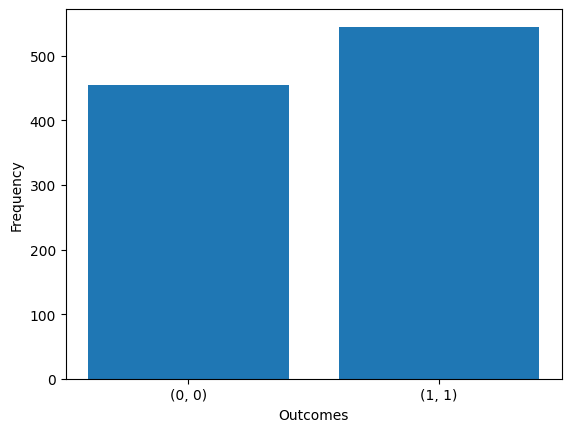

In [7]:
# Execute the original program without error correction and plot the results.
machine = local_machine_for(program.instruction_set)
machine.eval(program).plot_histogram()


In [8]:
# Compile the program with the Steane error-correcting compiler.
compiled, callbacks = compiler.compile(program)

# Print the compiled program.
print(compiled)


@instruction-set: cliffords-min

allocate q1.0:
  allocate q1.1:
    allocate q1.2:
      allocate q1.3:
        allocate q1.4:
          allocate q1.5:
            allocate q1.6:
              ---
              h q1.4
              h q1.5
              h q1.6
              cx q1.4 q1.0
              cx q1.4 q1.1
              cx q1.4 q1.3
              cx q1.5 q1.0
              cx q1.5 q1.2
              cx q1.5 q1.3
              cx q1.6 q1.1
              cx q1.6 q1.2
              cx q1.6 q1.3
              allocate q1.z.0:
                allocate q1.z.1:
                  allocate q1.z.2:
                    cx q1.0 q1.z.0
                    cx q1.1 q1.z.0
                    cx q1.3 q1.z.0
                    cx q1.4 q1.z.0
                    cx q1.0 q1.z.1
                    cx q1.2 q1.z.1
                    cx q1.3 q1.z.1
                    cx q1.5 q1.z.1
                    cx q1.1 q1.z.2
                    cx q1.2 q1.z.2
                    cx q1.3 q1.z.2
            

In [9]:
# Execute the error-corrected program with debug info to see all the instructions:
logger.setLevel(logging.DEBUG)

machine = local_machine_for(compiled.instruction_set, callbacks)
machine.single_shot(compiled)



2025-05-28 23:27:05,122 - DEBUG - Found gate z: [[1, 0], [0, -1]]
2025-05-28 23:27:05,124 - DEBUG - Found gate h: [[0.7071, 0.7071], [0.7071, -0.7071]]
2025-05-28 23:27:05,127 - DEBUG - Found gate y: [[0, (-0-1j)], [1j, 0]]
2025-05-28 23:27:05,128 - DEBUG - Found gate cz: [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]]
2025-05-28 23:27:05,129 - DEBUG - Found gate x: [[0, 1], [1, 0]]
2025-05-28 23:27:05,130 - DEBUG - Found gate cx: [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]]
2025-05-28 23:27:05,132 - DEBUG - restart: 17
2025-05-28 23:27:05,134 - DEBUG - eval: h [12]
2025-05-28 23:27:05,139 - DEBUG - eval: h [11]
2025-05-28 23:27:05,142 - DEBUG - eval: h [10]
2025-05-28 23:27:05,146 - DEBUG - eval: cx [16, 12]
2025-05-28 23:27:05,151 - DEBUG - eval: cx [15, 12]
2025-05-28 23:27:05,156 - DEBUG - eval: cx [13, 12]
2025-05-28 23:27:05,160 - DEBUG - eval: cx [16, 11]
2025-05-28 23:27:05,163 - DEBUG - eval: cx [14, 11]
2025-05-28 23:27:05,167 - DEBUG - eval: cx [13, 11]

(1, 1)

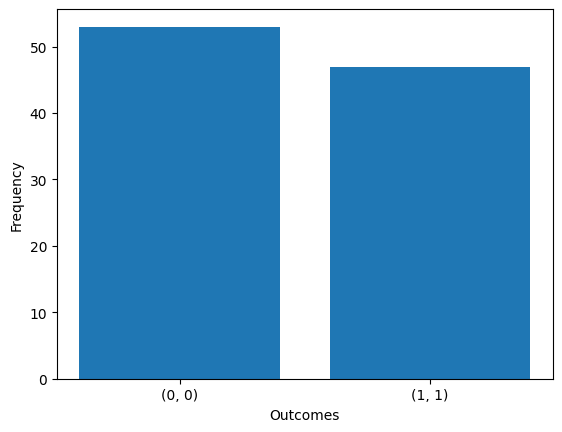

In [10]:
# Turn off debugging and show the histogram for 100 shots:
logger.setLevel(logging.INFO)
machine.eval(compiled, shots=100).plot_histogram()


In [11]:
%%qstack
# Demonstrate the state preparation routine for the Steane code.
@instruction-set: cliffords-min

allocate 0 1 2 3 4 5 6:
  h 4
  h 5
  h 6
  cx 4 0
  cx 4 1
  cx 4 3
  cx 5 0
  cx 5 2
  cx 5 3
  cx 6 1
  cx 6 2
  cx 6 3
measure

[Kernel(target=QubitId(value='0'), instructions=(Kernel(target=QubitId(value='1'), instructions=(Kernel(target=QubitId(value='2'), instructions=(Kernel(target=QubitId(value='3'), instructions=(Kernel(target=QubitId(value='4'), instructions=(Kernel(target=QubitId(value='5'), instructions=(Kernel(target=QubitId(value='6'), instructions=(QuantumInstruction(name='h', targets=[QubitId(value='4')], parameters={}), QuantumInstruction(name='h', targets=[QubitId(value='5')], parameters={}), QuantumInstruction(name='h', targets=[QubitId(value='6')], parameters={}), QuantumInstruction(name='cx', targets=[QubitId(value='4'), QubitId(value='0')], parameters={}), QuantumInstruction(name='cx', targets=[QubitId(value='4'), QubitId(value='1')], parameters={}), QuantumInstruction(name='cx', targets=[QubitId(value='4'), QubitId(value='3')], parameters={}), QuantumInstruction(name='cx', targets=[QubitId(value='5'), QubitId(value='0')], parameters={}), QuantumInstruction(name='cx', targets=[QubitId(value='

In [13]:
# Execute the state preparation routine and print the resulting histogram.
machine = local_machine_for(program.instruction_set)
for k, v in machine.eval(program).get_histogram().items():
    print(k, v)


(0, 0, 0, 0, 0, 0, 0) 123
(0, 1, 1, 1, 0, 0, 1) 108
(1, 0, 1, 1, 0, 1, 0) 127
(1, 1, 0, 1, 1, 0, 0) 130
(1, 0, 1, 0, 1, 0, 1) 109
(1, 1, 0, 0, 0, 1, 1) 134
(0, 0, 0, 1, 1, 1, 1) 154
(0, 1, 1, 0, 1, 1, 0) 115
